In [1]:
# Import necessary packages
using Plots

# Define the Braid structure
struct Braid
    n::Int
    xlim::Tuple{Int, Int}
    cex::Int
    bgcol::String
    lwd::Int
    p::Array{Complex{Float64}, 1}
    pp::Array{Complex{Float64}, 1}
end

# Define the Braid constructor
function Braid(n=6, xlim=(-5, n+8), cex=2, bgcol="#00CCFF", lwd=4)
    x = cex * collect(1:n)
    y = fill(20.0, n)
    m = n % 2 == 1 ? (n + 1) / 2 : n / 2
    x = n % 2 == 1 ? x .- m : x .- m .+ 0.5
    p = x .+ y .* im
    pp = vcat(p, p .- 20im)
    Braid(n, xlim, cex, bgcol, lwd, p, pp)
end

# Define the redata function
function redata(braid::Braid)
    x = braid.cex * collect(1:braid.n)
    y = fill(20.0, braid.n)
    m = braid.n % 2 == 1 ? (braid.n + 1) / 2 : braid.n / 2
    x = braid.n % 2 == 1 ? x .- m : x .- m .+ 0.5
    braid.p = x .+ y .* im
    braid.pp = vcat(braid.p, braid.p .- 20im)
end

# Define the initial function
function initial(braid::Braid)
    plot(legend=false, xlim=braid.xlim, ylim=(-2, 22), aspect_ratio=:equal)
    for i in 1:braid.n
        plot!([real(braid.pp[i]), real(braid.pp[i+braid.n])], [imag(braid.pp[i]), imag(braid.pp[i+braid.n])], color="yellow", linewidth=braid.lwd)
    end
    scatter!(real(braid.pp), imag(braid.pp), markersize=braid.cex, color="red")
    annotate!(braid.n/2 + 1.5, -1, text("+", 3, :yellow))
    annotate!(braid.n/2 + 1.5, 21, text("-", 4, :yellow))
end

# Define the cross function
function cross(braid::Braid, w::Complex{Float64}, sign::Int, k::Float64)
    ld = w - complex(0, 1.4, k)
    ru = w + complex(0, 1.4, k)
    # Draw rectangle
    plot!([real(ld), real(ld)], [imag(ld), imag(ru)], color="yellow", linewidth=braid.lwd)
    plot!([real(ld), real(ru)], [imag(ld), imag(ld)], color="yellow", linewidth=braid.lwd)
    plot!([real(ru), real(ru)], [imag(ld), imag(ru)], color="yellow", linewidth=braid.lwd)
    plot!([real(ld), real(ru)], [imag(ru), imag(ru)], color="yellow", linewidth=braid.lwd)
    # Draw cross
    if sign > 0
        plot!([real(ld), real(ru)], [imag(ld), imag(ru)], color="yellow", linewidth=braid.lwd)
    else
        plot!([real(ld), real(ru)], [imag(ru), imag(ld)], color="yellow", linewidth=braid.lwd)
    end
end

# Define the group function
function group(braid::Braid, vec::Vector{Int})
    for i in vec
        w = braid.pp[i] + complex(0, 1)
        sign = real(braid.pp[i]) < real(braid.pp[i+1]) ? 1 : -1
        cross(braid, w, sign, 1)
        braid.pp[i], braid.pp[i+1] = braid.pp[i+1], braid.pp[i]
    end
    redata(braid)
    initial(braid)
end

# Define the repeat function
function repeat(braid::Braid)
    while true
        # Simulate user input
        println("Enter two integers (separated by a space) to cross, or 'q' to quit:")
        input = readline()
        if input == "q"
            break
        else
            vec = parse.(Int, split(input))
            group(braid, vec)
        end
    end
end

repeat (generic function with 1 method)

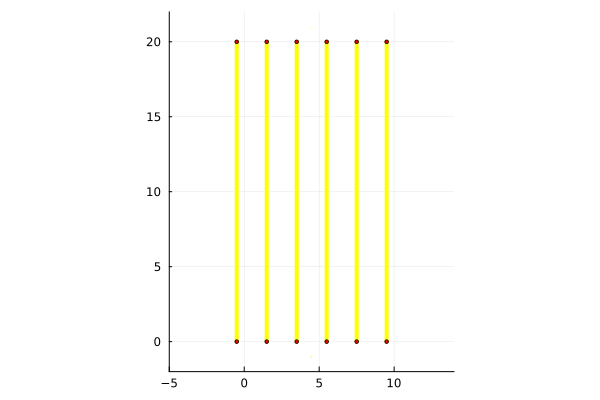

In [7]:


braid = Braid()
initial(braid)


In [8]:
group(braid, [2,4])

MethodError: MethodError: no method matching cross(::Braid, ::ComplexF64, ::Int64, ::Int64)
Closest candidates are:
  cross(::Braid, ::ComplexF64, ::Int64, !Matched::Float64) at ~/Documents/Codes/Julia/BraidGroups.jl/tmp.ipynb:48